In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
directory = '../data/'
output_dir = '../data/csv_grouped_data'

In [2]:
df = pd.read_csv(directory + "stocks_and_sentiment_2020.csv", sep=";", names=['date','sentiment','price'], encoding="ISO-8859-1")
df = df.iloc[:, 1:3]
df.head()
df_diff = df.copy()
df_diff["sentiment_diff"] = df["sentiment"].diff()
df_diff = df_diff.dropna()
df_diff = df_diff[["sentiment_diff", "price"]]
df_diff

,sentiment_diff,price
1,0.106048,-0.406118
2,0.034897,-0.227804
3,-0.049815,-0.386955
4,-0.237259,0.130323
5,0.184395,-0.101626
...,...,...
99,-0.055513,0.628993
100,0.105105,0.736907
101,-0.026628,0.800881
102,0.011612,-1.047923


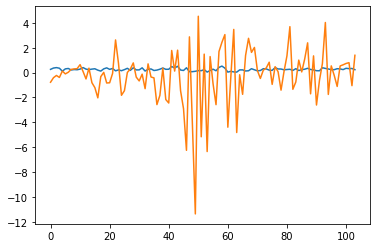

In [3]:

plt.plot(df)


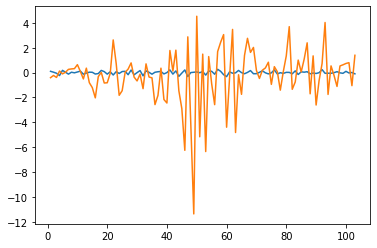

In [4]:
plt.plot(df_diff)

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df, maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1695  , p=0.6815  , df_denom=100, df_num=1
ssr based chi2 test:   chi2=0.1746  , p=0.6761  , df=1
likelihood ratio test: chi2=0.1744  , p=0.6762  , df=1
parameter F test:         F=0.1695  , p=0.6815  , df_denom=100, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1537  , p=0.8578  , df_denom=97, df_num=2
ssr based chi2 test:   chi2=0.3232  , p=0.8508  , df=2
likelihood ratio test: chi2=0.3227  , p=0.8510  , df=2
parameter F test:         F=0.1537  , p=0.8578  , df_denom=97, df_num=2


{1: ({'ssr_ftest': (0.16947531129817367, 0.6814595707931614, 100.0, 1),
   'ssr_chi2test': (0.17455957063711888, 0.6760909614371253, 1),
   'lrtest': (0.17441181985975618, 0.6762202829718192, 1),
   'params_ftest': (0.16947531129815668, 0.6814595707931812, 100.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.15367606531705, 0.8577581368263915, 97.0, 2),
   'ssr_chi2test': (0.3231950239657546, 0.850783565827864, 2),
   'lrtest': (0.3226840685870229, 0.851000949814609, 2),
   'params_ftest': (0.15367606531705746, 0.8577581368263868, 97.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [6]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_diff, maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7624  , p=0.0553  , df_denom=99, df_num=1
ssr based chi2 test:   chi2=3.8765  , p=0.0490  , df=1
likelihood ratio test: chi2=3.8046  , p=0.0511  , df=1
parameter F test:         F=3.7624  , p=0.0553  , df_denom=99, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2532  , p=0.2902  , df_denom=96, df_num=2
ssr based chi2 test:   chi2=2.6369  , p=0.2676  , df=2
likelihood ratio test: chi2=2.6030  , p=0.2721  , df=2
parameter F test:         F=1.2532  , p=0.2902  , df_denom=96, df_num=2


{1: ({'ssr_ftest': (3.762443094376297, 0.05526193363644491, 99.0, 1),
   'ssr_chi2test': (3.8764565214786093, 0.04896780419406044, 1),
   'lrtest': (3.804609851655158, 0.0511116819832067, 1),
   'params_ftest': (3.7624430943763056, 0.055261933636444764, 99.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.253171015431259, 0.29022710104836863, 96.0, 2),
   'ssr_chi2test': (2.636880678303274, 0.2675522675154397, 2),
   'lrtest': (2.6030468145015107, 0.27211693220567323, 2),
   'params_ftest': (1.2531710154312086, 0.2902271010483827, 96.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [7]:
# Split data
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df_train["sentiment"])
adf_test(df_train["price"])

Test Statistic         -7.525245e+00
p-value                 3.699544e-11
# Lags                  0.000000e+00
# Observations          9.900000e+01
Critical Value (1%)    -3.498198e+00
Critical Value (5%)    -2.891208e+00
Critical Value (10%)   -2.582596e+00
dtype: float64
 Series is Stationary
Test Statistic         -1.160068e+01
p-value                 2.653469e-21
# Lags                  0.000000e+00
# Observations          9.900000e+01
Critical Value (1%)    -3.498198e+00
Critical Value (5%)    -2.891208e+00
Critical Value (10%)   -2.582596e+00
dtype: float64
 Series is Stationary


In [8]:
# Split data
nobs = 4
df_train, df_test = df_diff[0:-nobs], df_diff[-nobs:]
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df_train["sentiment_diff"])
adf_test(df_train["price"])

Test Statistic         -6.201134e+00
p-value                 5.803617e-08
# Lags                  5.000000e+00
# Observations          9.300000e+01
Critical Value (1%)    -3.502705e+00
Critical Value (5%)    -2.893158e+00
Critical Value (10%)   -2.583637e+00
dtype: float64
 Series is Stationary
Test Statistic         -1.154040e+01
p-value                 3.646454e-21
# Lags                  0.000000e+00
# Observations          9.800000e+01
Critical Value (1%)    -3.498910e+00
Critical Value (5%)    -2.891516e+00
Critical Value (10%)   -2.582760e+00
dtype: float64
 Series is Stationary


In [9]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model = VAR(df)
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jun, 2020
Time:                     14:01:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.95540
Nobs:                     103.000    HQIC:                  -3.04671
Log likelihood:          -126.194    FPE:                  0.0446526
AIC:                     -3.10888    Det(Omega_mle):       0.0421609
--------------------------------------------------------------------
Results for equation sentiment
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.182486         0.027927            6.534           0.000
L1.sentiment         0.279901         0.101157            2.767           0.006
L1.price            -0.001897         0.004608           -0.

In [10]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
df_train = df_diff.iloc[:-1]

model = VAR(df_train)

results = model.fit(maxlags=15, ic='aic')
results.summary()

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jun, 2020
Time:                     14:02:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.36074
Nobs:                     97.0000    HQIC:                  -2.70858
Log likelihood:          -110.456    FPE:                  0.0527211
AIC:                     -2.94470    Det(Omega_mle):       0.0425286
--------------------------------------------------------------------
Results for equation sentiment_diff
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.004427         0.011388           -0.389           0.697
L1.sentiment_diff        -0.479660         0.114811           -4.178           0.000
L1.price                 -0.007729 

In [11]:
 lag_order = results.k_ar
 input = df_diff.values[-lag_order:]
 print(input.shape)
 print(input,lag_order)
 print(results.forecast(input, 1))
 print(df_diff.iloc[-lag_order -1:])

(5, 2)
[[-0.05551293  0.62899336]
 [ 0.10510499  0.73690663]
 [-0.02662816  0.8008812 ]
 [ 0.01161176 -1.04792342]
 [-0.09596542  1.39561073]] 5
[[ 0.00057491 -0.5080818 ]]
     sentiment_diff     price
98        -0.016683  0.538966
99        -0.055513  0.628993
100        0.105105  0.736907
101       -0.026628  0.800881
102        0.011612 -1.047923
103       -0.095965  1.395611


In [12]:

# convert to (records, timesteps, indicators)
def create_window_data_arrays(arrays,window_size):
    data = np.column_stack((arrays))
    arr_len = len(arrays[0])
    windows = np.array([data[i-window_size: i] for i in range(window_size +1,arr_len+1)])
    return windows


def create_window_data_array_with_shift(array,window_size, shift):
    return np.array([array[i-window_size: i] for i in range(shift +1,len(array)+1)])

In [13]:
lag_order = results.k_ar
print(df.values.shape)
train_x = create_window_data_arrays((df_diff.sentiment_diff,df_diff.price), lag_order)
print(train_x.shape)
print(train_x[-1])
print("----")
print(df_diff.values[-1])
print("----")
print(results.forecast(train_x[-1], 1))




(104, 2)
(98, 5, 2)
[[-0.05551293  0.62899336]
 [ 0.10510499  0.73690663]
 [-0.02662816  0.8008812 ]
 [ 0.01161176 -1.04792342]
 [-0.09596542  1.39561073]]
----
[-0.09596542  1.39561073]
----
[[ 0.00057491 -0.5080818 ]]


[ 0.00057491 -0.5080818 ]
(103, 2)
(98, 2)
1.9830879715524323
[[ 3.14980450e-02 -7.11855983e-02]
 [ 2.62752441e-01 -2.21497955e+00]
 [ 2.98581723e-01 -5.13933969e-01]
 [ 3.20585847e-01  3.31198024e-01]
 [ 6.42211712e-01 -7.59835012e-01]
 [ 9.32562400e-02  9.16113418e-01]
 [-5.07152834e-01  6.05572583e-01]
 [ 3.60328648e-01 -4.72473921e-01]
 [-8.08493276e-01  7.07893920e-01]
 [-1.20707422e+00  3.15993826e-02]
 [-2.02897360e+00 -9.97868085e-01]
 [-3.21244764e-01 -1.55050449e+00]
 [ 2.12251460e-02 -3.46604182e-01]
 [-8.33842823e-01  3.58484788e-01]
 [-8.14950436e-01 -8.51436035e-01]
 [-5.76532880e-02  7.31920191e-01]
 [ 2.63078390e+00 -1.30802499e+00]
 [ 7.32770411e-01 -2.13640469e+00]
 [-1.82291970e+00 -4.86884943e-01]
 [-1.45304722e+00  1.98437558e-02]
 [ 2.04997860e-02  1.33498193e+00]
 [ 2.85505247e-01 -6.00895848e-01]
 [ 7.82741000e-01 -1.48241499e-02]
 [-3.58820573e-01  4.70085705e-01]
 [-6.67625205e-01 -1.08028449e+00]
 [-1.21770377e-01  1.25723345e+00]
 [-1.28956207e+00 -6.7223169

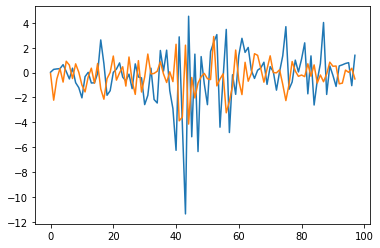

In [33]:
results.forecast(train_x[0], 1)
forecasted = np.array([list(results.forecast(train_x[i], 1)[0]) for i in range(0,train_x.shape[0])])
print(forecasted[-1])

print(df_diff.values.shape)
print(forecasted.shape)

#y_pred = forecasted
#y_train = df_diff.values[5:]

y_pred = forecasted[:,1:]
y_train = df_diff.price.values[lag_order:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M)
